0. 코랩에서 데이터 파일 열기

In [8]:
import matplotlib.pyplot as plt

In [30]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드
from google.colab import files
file_uploaded=files.upload()

Saving 인터넷반응DB_9월5주_11월1주.xlsx to 인터넷반응DB_9월5주_11월1주.xlsx


(참고용) 구글 드라이브 마운트

In [4]:
#코랩에서 구글 드라이브에 올린 파일을 사용하기 위해 마운트(연결)하는 코드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


코랩에서 한글 폰트 사용하기

- 코랩에서 이 과정 없이 한글을 쓰면 깨져서 나옴.

In [2]:
# 그래프에 한글 폰트 사용하는 코드 -> 실행 후 [런타임]-[런타임 다시 시작] 메뉴를 이용하여 런타임 재시작!
!sudo apt-get install -y fonts-nanum # 나눔 소문자로
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [9]:
#런타임 재시작 이후 한글 폰트 선택
plt.rc('font', family='NanumBarunGothic')

In [10]:
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


데이터 불러오기(135쪽)

- 인터넷 반응 지표 데이터 불러오기

In [13]:
import pandas as pd                                            # 판다스 라이브러리 불러오기
df = pd.read_excel("인터넷반응DB_9월5주_11월1주.xlsx")                                            # 인터넷 반응 지표 데이터 불러오기
df                                            # 구글 드라이브에 저장한 데이터 경로

,주차,프로그램명,채널,요일,게시글,댓글,동영상 조회,뉴스,동영상,게시글 비율,댓글 비율,동영상 조회 비율,뉴스 비율,동영상 비율,가구,2049,가구 시청률,2049 시청률
0,202239,* 라디오스타,MBC,수,214,658,1040480,377,47,0.7,0.6,1.4,1.5,0.9,798107,400677,4.0,1.8
1,202239,알토란,MBN,화,95,182,6703,16,44,0.3,0.2,0.0,0.1,0.8,166179,21020,0.8,0.1
2,202239,엄지의제왕,MBN,화,28,3,21807,0,24,0.1,0.0,0.0,0.0,0.4,121993,67785,0.6,0.3
3,202239,이제 만나러 갑니다,채널A,일,13,9,38800,20,25,0.0,0.0,0.1,0.1,0.5,166790,74058,0.8,0.3
4,202239,불후의 명곡,KBS2,토,358,1324,244385,222,52,1.2,1.2,0.3,0.9,1.0,1330395,348610,6.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,202244,세컨 하우스,KBS2,목,56,42,34207,427,34,0.2,0.1,0.1,2.1,1.0,751647,223284,3.7,1.0
813,202244,* 버디보이즈,JTBC,일,17,182,15500,38,34,0.1,0.2,0.0,0.2,1.0,94955,26898,0.5,0.1
814,202244,팬레터를 보내주세요,MBC,금,19,11,0,0,0,0.1,0.0,0.0,0.0,0.0,0,0,0.0,0.0
815,202244,복덩이들고,TV CHOSUN,수,31,341,5593,92,2,0.1,0.4,0.0,0.5,0.1,0,0,0.0,0.0


데이터 살펴보기(135~136쪽)

- 데이터의 전체 크기 확인

In [14]:
df.shape# 전체 행과 열의 개수

(817, 18)

- 인터넷 반응 지표 데이터의 속성 (컬럼 파악하기)

In [15]:
df.head()

,주차,프로그램명,채널,요일,게시글,댓글,동영상 조회,뉴스,동영상,게시글 비율,댓글 비율,동영상 조회 비율,뉴스 비율,동영상 비율,가구,2049,가구 시청률,2049 시청률
0,202239,* 라디오스타,MBC,수,214,658,1040480,377,47,0.7,0.6,1.4,1.5,0.9,798107,400677,4.0,1.8
1,202239,알토란,MBN,화,95,182,6703,16,44,0.3,0.2,0.0,0.1,0.8,166179,21020,0.8,0.1
2,202239,엄지의제왕,MBN,화,28,3,21807,0,24,0.1,0.0,0.0,0.0,0.4,121993,67785,0.6,0.3
3,202239,이제 만나러 갑니다,채널A,일,13,9,38800,20,25,0.0,0.0,0.1,0.1,0.5,166790,74058,0.8,0.3
4,202239,불후의 명곡,KBS2,토,358,1324,244385,222,52,1.2,1.2,0.3,0.9,1.0,1330395,348610,6.6,1.6


- 인터넷 반응 지표 데이터의 비어 있는 속성 확인 (결측치)

In [16]:
df.isna().sum()# isna() 함수는 결측 값에 대해 True를 표시해 주며, sum() 함수는 true(=1)인 값들의 합을 계산함.

주차           0
프로그램명        0
채널           0
요일           0
게시글          0
댓글           0
동영상 조회       0
뉴스           0
동영상          0
게시글 비율       0
댓글 비율        0
동영상 조회 비율    0
뉴스 비율        0
동영상 비율       0
가구           0
2049         0
가구 시청률       0
2049 시청률     0
dtype: int64

- df_c에 개수로 된 데이터와 정답 데이터만 저장

In [17]:
df_c = df[['프로그램명', '게시글', '댓글', '동영상 조회', '뉴스', '동영상', '가구 시청률', '2049 시청률']]
df_c

,프로그램명,게시글,댓글,동영상 조회,뉴스,동영상,가구 시청률,2049 시청률
0,* 라디오스타,214,658,1040480,377,47,4.0,1.8
1,알토란,95,182,6703,16,44,0.8,0.1
2,엄지의제왕,28,3,21807,0,24,0.6,0.3
3,이제 만나러 갑니다,13,9,38800,20,25,0.8,0.3
4,불후의 명곡,358,1324,244385,222,52,6.6,1.6
...,...,...,...,...,...,...,...,...
812,세컨 하우스,56,42,34207,427,34,3.7,1.0
813,* 버디보이즈,17,182,15500,38,34,0.5,0.1
814,팬레터를 보내주세요,19,11,0,0,0,0.0,0.0
815,복덩이들고,31,341,5593,92,2,0.0,0.0


- 데이터 속성들의 관계 수치로 나타내기

In [18]:
df_c.corr()# corr() 함수는 속성들의 관계를 상관 계수로 나타냄.

,게시글,댓글,동영상 조회,뉴스,동영상,가구 시청률,2049 시청률
게시글,1.000000,0.876243,0.736518,0.657469,0.431793,0.226169,0.351078
댓글,0.876243,1.000000,0.626708,0.606432,0.375832,0.233715,0.340065
동영상 조회,0.736518,0.626708,1.000000,0.587113,0.516178,0.274593,0.409148
뉴스,0.657469,0.606432,0.587113,1.000000,0.488681,0.409279,0.508137
동영상,0.431793,0.375832,0.516178,0.488681,1.000000,0.460855,0.469175
가구 시청률,0.226169,0.233715,0.274593,0.409279,0.460855,1.000000,0.894023
2049 시청률,0.351078,0.340065,0.409148,0.508137,0.469175,0.894023,1.000000


데이터 시각화하기

① 전체 데이터에 대한 시청률 속성과 다른 데이터 속성들의 관계 시각화하기

- 전체 데이터에 대한 시청률 속성과 다른 속성들의 관계 시각화

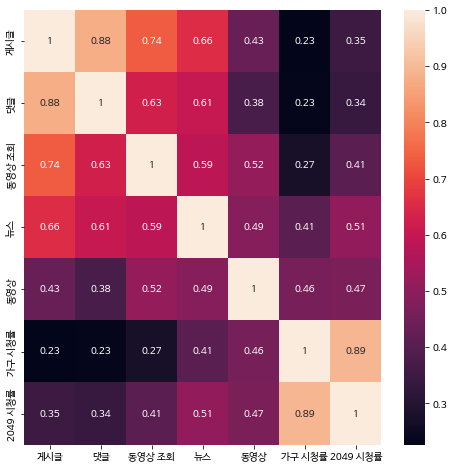

In [19]:
import matplotlib.pyplot as plt# 맷플롯립 파이플롯 라이브러리 불러오기
import seaborn as sns# 시본 라이브러리 불러오기
plt.figure(figsize=(8, 8))# 파이플롯에 있는 figure() 함수로 크기 조정
sns.heatmap(df_c.corr(), annot=True)# 시본 라이브러리에 있는 heatmap() 함수로 상관 계수 시각화

② 특정 데이터에 대한 시청률 속성과 다른 데이터 속성들의 관계 시각화하기

- 속성 이름과 비교 연산자를 이용한 최고 시청률 프로그램 탐색

In [20]:
# 속성 이름과 비교 연산자를 이용하여 시청률이 가장 높은 프로그램명 검색
df_c["가구 시청률"].max()

19.4

In [21]:
df_c["동영상 조회"].max()

8995587

In [22]:
df_c["가구 시청률"].mean()

2.2642594859241125

In [23]:
df_c["프로그램명"][df_c["가구 시청률"] == df_c["가구 시청률"].max()]

61    으라차차 내 인생
Name: 프로그램명, dtype: object

In [24]:
df_c["프로그램명"][df_c["가구 시청률"] == df_c["가구 시청률"].min()]

10           주간아이돌
13       * 스페이스 공감
41      * 오늘부터 운동뚱
51      화요일은 밤이 좋아
66     내 몸을 바꾸는 시간
          ...     
810         뜨겁게 안녕
811           일타강사
814     팬레터를 보내주세요
815          복덩이들고
816        매드 지니어스
Name: 프로그램명, Length: 164, dtype: object

In [25]:
df_c["프로그램명"][df_c["2049 시청률"] == df_c["2049 시청률"].max()]

487    천원짜리 변호사
624    천원짜리 변호사
Name: 프로그램명, dtype: object

- df_p에 최고 시청률 프로그램의 데이터 속성 저장

In [26]:
# 가장 높은 시청률 프로그램명을 이용하여 해당 프로그램 데이터 속성만 df_p에 저장
df_p = df_c[df_c["프로그램명"] == "천원짜리 변호사"]
df_p

,프로그램명,게시글,댓글,동영상 조회,뉴스,동영상,가구 시청률,2049 시청률
104,천원짜리 변호사,1344,5014,7003080,694,76,10.0,5.3
231,천원짜리 변호사,1285,4327,6571215,633,87,11.6,6.4
358,천원짜리 변호사,1358,4017,6512520,567,68,11.3,5.8
487,천원짜리 변호사,1350,6183,6140807,678,62,11.0,6.5
624,천원짜리 변호사,754,2554,3659069,438,48,10.7,6.5
762,천원짜리 변호사,710,3058,4491522,538,44,10.0,5.4


- 특정 프로그램에 대한 시청률 속성과 다른 속성의 관계 시각화

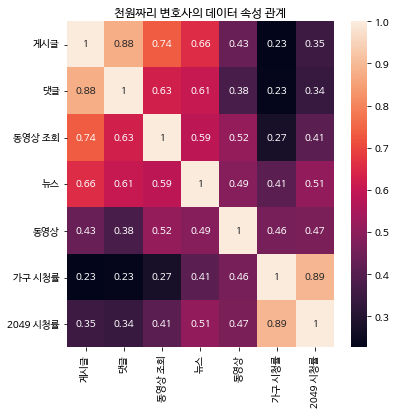

In [27]:
plt.figure(figsize=(6, 6))# 파이플롯에 있는 figure() 함수로 크기 조정
plt.title("천원짜리 변호사의 데이터 속성 관계")# title() 함수로 그래프 제목 넣기
sns.heatmap(df_c.corr(), annot=True)

③ 여러 데이터 속성이 프로그램마다 어떤 역할을 하는지 확인하기

- 시청률 높은 프로그램명 검색하기

In [28]:
# 속성 이름과 비교 연산자를 이용하여 시청률 5프로 이상의 프로그램명을 검색
df_c["프로그램명"][df_c["2049 시청률"] >= 5]

20      미운 우리 새끼
35     1박 2일 시즌4
104     천원짜리 변호사
105    삼남매가 용감하게
154     미운 우리 새끼
170    1박 2일 시즌4
231     천원짜리 변호사
286     미운 우리 새끼
302    1박 2일 시즌4
358     천원짜리 변호사
418     미운 우리 새끼
434    1박 2일 시즌4
487     천원짜리 변호사
488    삼남매가 용감하게
624     천원짜리 변호사
697     미운 우리 새끼
713    1박 2일 시즌4
762     천원짜리 변호사
763    삼남매가 용감하게
Name: 프로그램명, dtype: object

In [59]:
tp = list(df_c["프로그램명"][df_c["2049 시청률"] >= 4])
type(tp)
tp_set = set(tp)
tp_set

{'* 나혼자산다',
 '1박 2일 시즌4',
 '미운 우리 새끼',
 '삼남매가 용감하게',
 '안싸우면 다행이야',
 '으라차차 내 인생',
 '작은 아씨들',
 '천원짜리 변호사',
 '황금 가면'}

- df_m에 3개의 프로그램 정보 저장

In [29]:
# 속성 이름과 append() 함수를 이용하여 세 개의 프로그램의 정보를 df_m에 저장함.
df_m = df_c[df_c["프로그램명"] == "* 나혼자산다"]
df_m = df_m.append(df_c[df_c["프로그램명"] == "미운 우리 새끼"])
df_m = df_m.append(df_c[df_c["프로그램명"] == "천원짜리 변호사"])

df_m

,프로그램명,게시글,댓글,동영상 조회,뉴스,동영상,가구 시청률,2049 시청률
6,* 나혼자산다,670,2367,1344365,396,46,5.9,4.2
140,* 나혼자산다,619,2526,1639706,402,40,5.4,3.8
272,* 나혼자산다,610,2082,1507146,462,44,6.0,4.1
404,* 나혼자산다,821,3262,1562805,505,50,5.4,3.7
542,* 나혼자산다,578,2085,1035347,343,44,5.4,3.9
683,* 나혼자산다,354,898,589593,130,10,0.0,0.0
20,미운 우리 새끼,263,678,1160961,271,29,10.4,5.6
154,미운 우리 새끼,406,1213,832565,266,41,11.9,5.7
286,미운 우리 새끼,203,555,730081,280,24,12.2,5.8
418,미운 우리 새끼,233,824,1157466,331,41,11.6,6.2


- 시청률 높은 프로그램에 대한 시청률 속성과 다른 속성의 관계 시각화

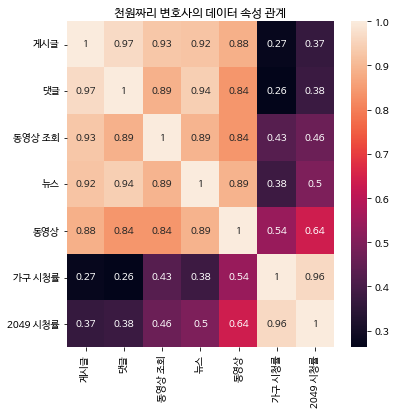

In [30]:
plt.figure(figsize=(6, 6))# 파이플롯에 있는 figure() 함수로 크기 조정
plt.title("천원짜리 변호사의 데이터 속성 관계")# title() 함수로 그래프 제목 넣기
sns.heatmap(df_m.corr(), annot=True)

- 시청자 반응 데이터 속성들이 프로그램을 식별할 수 있는지 확인하기

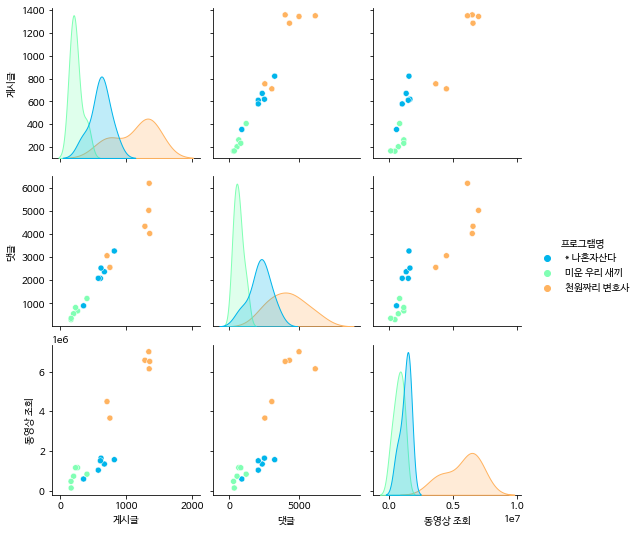

In [32]:
df_m = df_m [['프로그램명', '게시글', '댓글', '동영상 조회']]
sns.pairplot(data=df_m, palette='rainbow', hue='프로그램명')